In [1]:
import numpy as np

def saas_startup_vs_mature(n_sims=10_000):
    base_rev = 10_000_000

    # --- STARTUP PHASE (High Volatility) ---
    startup_churn = np.random.normal(0.15, 0.05, n_sims)      # high churn
    startup_sales = np.random.normal(1_500_000, 800_000, n_sims)

    startup_net_rev = base_rev * (1 - startup_churn) + startup_sales

    # --- AMAZON PHASE (Stability) ---
    mature_churn = np.random.normal(0.05, 0.01, n_sims)       # low churn
    mature_sales = np.random.normal(1_500_000, 300_000, n_sims)

    mature_net_rev = base_rev * (1 - mature_churn) + mature_sales

    # --- Risk Metrics ---
    startup_prob_loss = np.mean(startup_net_rev < base_rev)
    mature_prob_loss = np.mean(mature_net_rev < base_rev)

    startup_var = np.percentile(startup_net_rev, 5)
    mature_var = np.percentile(mature_net_rev, 5)

    print("STARTUP PHASE")
    print(f"Probability of Revenue Decline: {startup_prob_loss:.2%}")
    print(f"5% Value at Risk: ${startup_var:,.0f}\n")

    print("AMAZON PHASE")
    print(f"Probability of Revenue Decline: {mature_prob_loss:.2%}")
    print(f"5% Value at Risk: ${mature_var:,.0f}")

saas_startup_vs_mature()


STARTUP PHASE
Probability of Revenue Decline: 49.63%
5% Value at Risk: $8,443,947

AMAZON PHASE
Probability of Revenue Decline: 0.06%
5% Value at Risk: $10,480,828


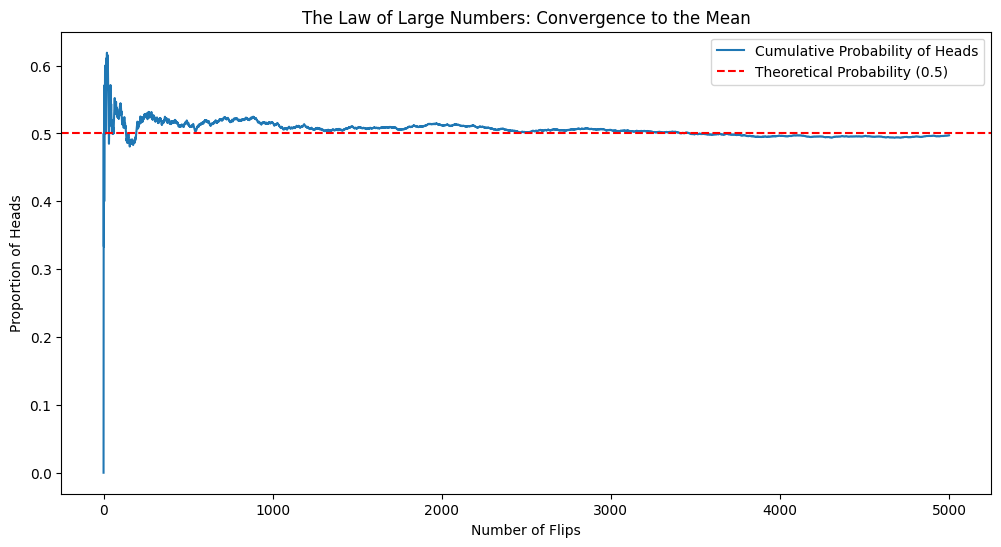

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [3]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)


Win Rate (Stay): 33.33%
Win Rate (Switch): 66.67%


Probability of Revenue Decline: 17.10%
95% Value at Risk (Worst Case): $9,615,438.52


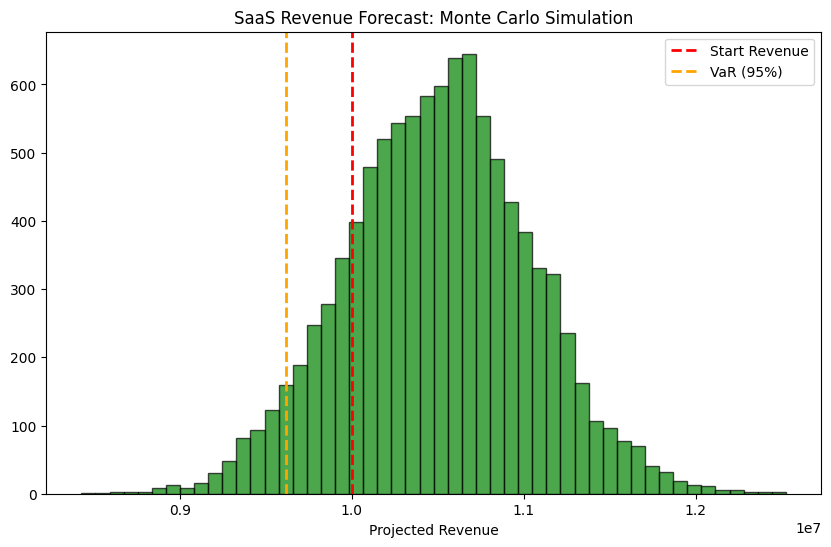

In [4]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)


Normal Model VaR (5%): $9,609,898
Fat-Tail Model VaR (5%): $9,293,253


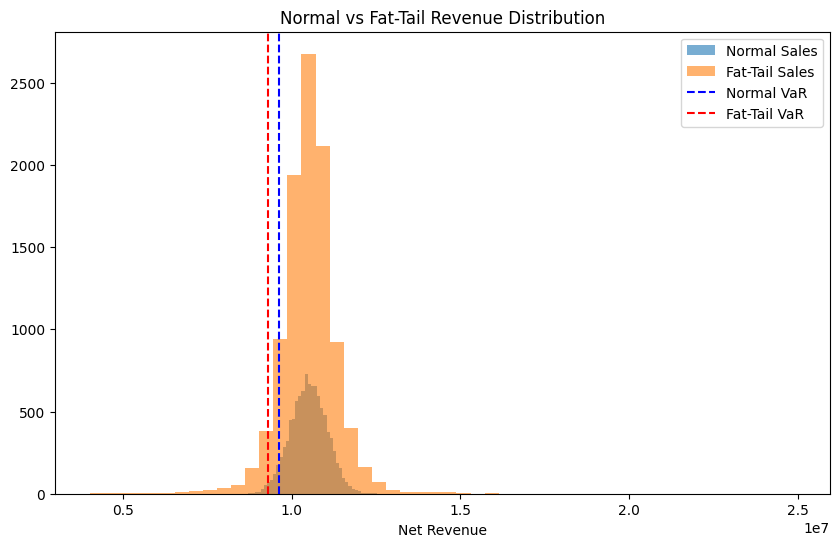

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def saas_risk_model_compare(n_sims=10_000):
    base_rev = 10_000_000

    # --- Shared input ---
    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    # --- NORMAL SALES MODEL ---
    sales_normal = np.random.normal(1_500_000, 500_000, n_sims)
    net_rev_normal = base_rev * (1 - churn_sims) + sales_normal

    var_normal = np.percentile(net_rev_normal, 5)

    # --- FAT TAIL SALES MODEL (Student t) ---
    t_sales = np.random.standard_t(df=3, size=n_sims)

    # Scale to match magnitude
    t_sales_scaled = 1_500_000 + t_sales * 500_000
    net_rev_fat = base_rev * (1 - churn_sims) + t_sales_scaled

    var_fat = np.percentile(net_rev_fat, 5)

    print(f"Normal Model VaR (5%): ${var_normal:,.0f}")
    print(f"Fat-Tail Model VaR (5%): ${var_fat:,.0f}")

    # --- Visualization ---
    plt.figure(figsize=(10,6))
    plt.hist(net_rev_normal, bins=50, alpha=0.6, label="Normal Sales")
    plt.hist(net_rev_fat, bins=50, alpha=0.6, label="Fat-Tail Sales")
    plt.axvline(var_normal, color='blue', linestyle='dashed', label='Normal VaR')
    plt.axvline(var_fat, color='red', linestyle='dashed', label='Fat-Tail VaR')
    plt.legend()
    plt.title("Normal vs Fat-Tail Revenue Distribution")
    plt.xlabel("Net Revenue")
    plt.show()

saas_risk_model_compare()
